In [155]:
# Importing necessary libraries and modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import heatmap

In [31]:
# Load data
countries = pd.read_csv("./data/village_savings/Countries.csv")
locations = pd.read_csv("./data/village_savings/Locations.csv")
regions = pd.read_csv("./data/village_savings/Regions.csv")
members = pd.read_csv("./data/village_savings/Members.csv", sep="\t") #tab seperated csv
group_members = pd.read_csv("./data/village_savings/GroupMembers.csv")
groups = pd.read_csv("./data/village_savings/SavingsGroups.csv", sep="\t")


In [32]:
# Join data: Location Name, Region Name, and Country Name
groups = groups.merge(locations, on="LocationId").merge(regions, on="RegionId").merge(countries, on="CountryCode")

In [151]:
groups.head()

,GroupID,GroupName,MaximumMemberCount,LanguageCode,CurrencyCode,LocationId,IsActive,GroupStatusCode,GroupTypeCode,DateCreated,LocationName,RegionId,RegionName,CountryCode,CountryName,PhoneCode,IsKhusaServiceOffered,GMTHours,NumberOfMembers
0,1,Brakus-Borer,20,en-GB,MWK,7,1,A,V,20:09.8,Lilongwe,2,Central,MW,Malawi,265,1,2,19
1,2,"Bergstrom, Raynor and Gutmann",10,en-GB,MWK,7,1,A,V,31:19.9,Lilongwe,2,Central,MW,Malawi,265,1,2,0
2,3,Carroll and Sons,8,en-GB,MWK,7,1,E,V,29:02.8,Lilongwe,2,Central,MW,Malawi,265,1,2,0
3,4,Hoppe-Lueilwitz,10,en-GB,MWK,7,1,E,M,04:19.3,Lilongwe,2,Central,MW,Malawi,265,1,2,0
4,8,Ward LLC,20,en-GB,MWK,7,1,E,V,05:46.1,Lilongwe,2,Central,MW,Malawi,265,1,2,1


In [144]:
# Get Member of groups
# groups[groups.GroupStatusCode != 'E']
groups['NumberOfMembers'] = 0
for idx, row in groups.iterrows():
   if row.IsKhusaServiceOffered == 1:
       groups.at[idx, 'NumberOfMembers'] = group_members[lambda x: x.GroupID == row.GroupID]['GroupID'].count()

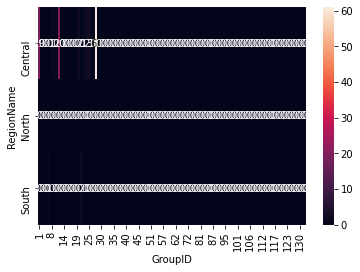

In [172]:
group_pivot_table = pd.pivot_table(groups[groups.CountryCode == 'MW'], values='NumberOfMembers', columns=['GroupID'], index=['RegionName'], fill_value=0)
fig, ax = plt.subplots()
heat

In [176]:
groups.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
           dtype='int64', length=132)